# Daily Dose of Data Science

The notebook accompanies the code for improving the performance of Random Forest Model. 

[Your Random Forest is Underperforming and You Don't Even Know It](https://www.blog.dailydoseofds.com/p/your-random-forest-is-underperforming)

Author: Avi Chawla

In [1]:
import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [2]:
plt.rcParams['font.family'] = ['Comic Sans MS', 'sans-serif']

colors = ['#fe7c73', '#2471A3']

## Create dataset

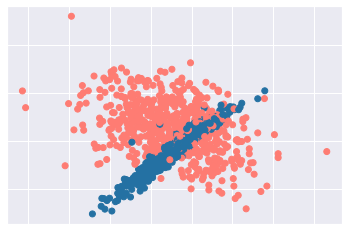

In [7]:
# Generate some synthetic data to train the decision tree on
X, y = make_classification(
    n_samples=1200, 
    n_features=2, 
    n_clusters_per_class=1,
    n_informative=2, class_sep=0.5,
    n_redundant=0,
    n_repeated=0
)

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

## Train Random Forest Model

In [8]:
model = RandomForestClassifier(max_features="sqrt", max_samples=0.9, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.9, random_state=42)

In [9]:
model.score(X_test, y_test)

0.88

In [10]:
model_accs = [] # list to store accuracies

for idx, tree in enumerate(model.estimators_):

    score = tree.score(X_test, y_test) # find accuracy
    model_accs.append([idx, score]) # store accuracy
    
model_accs = np.array(model_accs)

In [11]:
sorted_indices = np.argsort(model_accs[:, 1])[::-1]

# Rearrange the rows of the array based on the sorted indices
model_ids = model_accs[sorted_indices][:,0].astype(int)

In [12]:
model.estimators_ = np.array(model.estimators_)[model_ids].tolist()

In [13]:
result = []
total_models = len(model.estimators_) 
for i in range(2, total_models):
    
    small_model = copy.deepcopy(model)
    
    small_model.estimators_ = model.estimators_[:i]
    result.append([i, small_model.score(X_test, y_test)])
    
result = np.array(result)

In [14]:
max_index = np.argmax(result[:, 1])
max_index

3

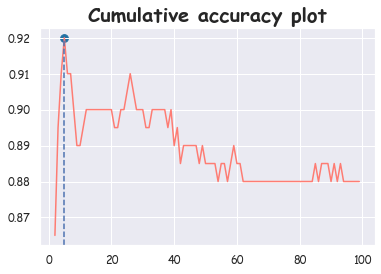

In [15]:
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], c = colors[0])
ax.axvline(x=result[max_index][0], ymax=0.95, ls = "--")
plt.scatter([result[max_index][0],], [result[max_index][1],], zorder=0, s=60, c = colors[1])

ax.set_title("Cumulative accuracy plot", fontsize = 20, fontweight = "bold")
plt.savefig("Cumulative_acc.jpeg", dpi = 600, bbox_inches = "tight")
plt.show()

## Create final model

In [16]:
small_model = copy.deepcopy(model)

small_model.estimators_ = model.estimators_[:int(result[max_index][0])]

In [17]:
small_model.score(X_test, y_test)

0.92

In [18]:
model.score(X_test, y_test)

0.88

In [19]:
%timeit model.predict(X_test)

4.69 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit small_model.predict(X_test)

358 µs ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
